<a href="https://colab.research.google.com/github/olonok69/LLM_Notebooks/blob/main/embeddings/How_to_generate_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EMBEDDINGS
Embeddings in the context of large language models (LLMs) are dense vector representations of text. They are a way to convert words, phrases, or even entire documents into numerical form so that they can be processed by machine learning models.

### What Are Embeddings?
- Vector Representation: Embeddings transform text into vectors (arrays of numbers). Each dimension of the vector captures some aspect of the text's meaning.

- Dimensionality Reduction: Instead of representing words as sparse vectors (like one-hot encoding), embeddings use dense vectors with much lower dimensionality, making computations more efficient.

- Semantic Meaning: Words with similar meanings are mapped to vectors that are close to each other in the embedding space. For example, the words "king" and "queen" would have similar embeddings.

### How Are They Used in LLMs?
- Input Representation: When text is fed into an LLM, it is first converted into embeddings. These embeddings serve as the input to the model.

- Contextual Understanding: LLMs like BERT, GPT, and Mistral generate embeddings that capture the context of words within a sentence. This means the same word can have different embeddings depending on its context.

- Downstream Tasks: Embeddings are used for various NLP tasks such as text classification, sentiment analysis, and information retrieval. They can also be used in recommendation systems, as you mentioned earlier.


The choice between using the last hidden layer or the second-to-last hidden layer for embeddings can depend on your specific task and model. Here are some considerations:

- Last Hidden Layer: This layer contains the most contextually rich and semantically meaningful representations of the input text. It's often used because it captures the final output of the model's processing.

- Second-to-Last Hidden Layer: Some studies suggest that the second-to-last layer can provide better embeddings for certain tasks. This is because the last layer might be too specialized for the model's training objective (e.g., masked language modeling), while the second-to-last layer retains more general features

# MTEB
MTEB is a massive benchmark for measuring the performance of text embedding models on diverse embedding tasks.

- https://huggingface.co/blog/mteb
- https://huggingface.co/spaces/mteb/leaderboard

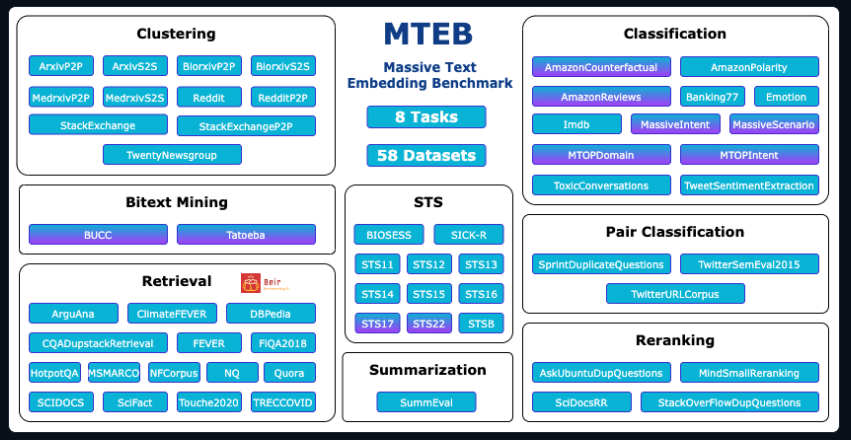


# large EMbeddings vs Small Embeddings
The choice between using large or small embeddings depends on your specific needs and constraints. Here are some key points to consider:

#### Large Embeddings
Pros:

- Richer Representations: Larger embeddings capture more nuanced and detailed information, which can improve performance on complex tasks1.
- Better Contextual Understanding: They often provide a deeper understanding of the text, which is beneficial for tasks requiring high accuracy1.

Cons:

- Higher Computational Cost: They require more memory and processing power, which can be a limitation for real-time applications or when working with large datasets1.
- Increased Cost: Larger embeddings can be more expensive to use, especially if you're processing a high volume of text1.

#### Small Embeddings
Pros:

- Faster Processing: Smaller embeddings are quicker to compute, making them suitable for applications where speed is critical1.
-Cost-Effective: They are generally cheaper to use, which is advantageous for budget-sensitive projects1.

Cons:

- Limited Performance: They might not capture as much detail, which can affect performance on more complex tasks1.
- Less Rich Representations: Smaller embeddings may struggle with nuanced queries and might not perform as well in tasks requiring deep semantic understanding1.

#### Practical Considerations
- Task Complexity: For simple tasks, small embeddings might suffice. For more complex tasks, large embeddings could provide better results.
- Resource Availability: Consider your computational resources and budget. If you have limited resources, small embeddings might be more practical.
- Experimentation: It's often beneficial to experiment with both sizes to see which one performs better for your specific use case.

In [1]:
! pip install -U bitsandbytes Faker -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 83.3 MB/s eta 0:00:00


In [2]:
from transformers import AutoTokenizer, AutoModel
import torch
import json
import gc
import datetime
from faker import Faker
fake = Faker()
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [4]:
torch.cuda.empty_cache()
gc.collect()

0

# Mistral

https://huggingface.co/mistralai/Mistral-7B-v0.1

Embeddings 4096

Mistral 7B: This model has a context window size of 32k with default of 8,000 tokens

In [5]:
model_id = "mistralai/Mistral-7B-v0.1"

In [6]:
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModel.from_pretrained(model_id, device_map="auto", load_in_8bit=True)

tokenizer_config.json:   0%|          | 0.00/996 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/493k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.80M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/25.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.94G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.54G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [7]:
model

MistralModel(
  (embed_tokens): Embedding(32000, 4096)
  (layers): ModuleList(
    (0-31): 32 x MistralDecoderLayer(
      (self_attn): MistralSdpaAttention(
        (q_proj): Linear8bitLt(in_features=4096, out_features=4096, bias=False)
        (k_proj): Linear8bitLt(in_features=4096, out_features=1024, bias=False)
        (v_proj): Linear8bitLt(in_features=4096, out_features=1024, bias=False)
        (o_proj): Linear8bitLt(in_features=4096, out_features=4096, bias=False)
        (rotary_emb): MistralRotaryEmbedding()
      )
      (mlp): MistralMLP(
        (gate_proj): Linear8bitLt(in_features=4096, out_features=14336, bias=False)
        (up_proj): Linear8bitLt(in_features=4096, out_features=14336, bias=False)
        (down_proj): Linear8bitLt(in_features=14336, out_features=4096, bias=False)
        (act_fn): SiLU()
      )
      (input_layernorm): MistralRMSNorm((4096,), eps=1e-05)
      (post_attention_layernorm): MistralRMSNorm((4096,), eps=1e-05)
    )
  )
  (norm): MistralRMS

In [8]:
test1 = fake.text(3000)
test2 = fake.text(3000)



In [9]:
test1

'Friend child on society indeed sister various key. Impact fine between kid movie that oil door.\nFinal discussion fine allow enter include see. Catch full after also really.\nNorth first some record. Beyond turn design none away. Population television person result.\nWhite reveal factor during high site. Sometimes together gas suddenly thought what pick. Task compare while range of about radio set.\nHold factor none since. Throw strategy president book.\nScene magazine machine environmental three red second. Anyone baby after art.\nReduce look military effort character news loss member. East in theory authority sing international particular. Not debate drop day hard official thousand. Theory go dinner police civil eight owner.\nIn than social stuff situation music seek. Room him affect easy dinner ok. Event half single practice fall forward.\nOthers sea foot green from top reason. You address effort white strong stay ability social. Name young age like former.\nFocus more rise usually

In [10]:
test2

'Ever toward minute central garden economic laugh. Husband vote theory piece north serve responsibility. Break loss consider source its year.\nThroughout indicate east sure ok. Return issue section. Necessary option TV ok.\nCondition late employee son assume before. Friend management only back price article show. Down environmental affect reflect.\nBit back record plant already wish. Know wonder people side ahead yard front after.\nOut firm but raise nice speech near. Guess region painting land. Who particularly up church only.\nAct foot subject think piece.\nStill role series seek often buy some.\nChange debate investment. Dog offer few.\nRequire can enjoy tree impact. Involve support attorney risk save. Hit participant rise.\nCountry activity along when information. Article from nice dark. Question fly north describe general. Administration animal hard popular.\nBe reduce skill fine once artist figure. Effect painting age game question end everyone. Company tax fear indicate physical

In [11]:
inputs = tokenizer(test1, return_tensors="pt", truncation=True, max_length=512)

In [12]:
len(inputs["input_ids"][0])

512

In [13]:
embeddings_mistral = {}

In [14]:
time_start = datetime.datetime.now()
for i in range(100):
  inputs = tokenizer(fake.text(3000), return_tensors="pt", truncation=True, max_length=512)
  inputs = inputs.to("cuda")
  with torch.no_grad():
      outputs = model(**inputs, output_hidden_states=True)
      hidden_states = outputs.hidden_states
      second_to_last_layer = hidden_states[-2]
      embeddings_mistral[i] = second_to_last_layer.mean(dim=1).cpu().numpy()
time_end = datetime.datetime.now()
print(f"Time taken: {time_end - time_start}")

Time taken: 0:00:33.562245


In [17]:
second_to_last_layer

tensor([[[-0.8857, -0.9004, -1.0469,  ..., -1.0547, -0.6084,  0.1787],
         [-0.1975, -0.5195, -0.0771,  ..., -0.1581, -0.2448,  0.4905],
         [ 0.3069,  0.4509, -0.2214,  ...,  0.3950,  0.2357,  0.4438],
         ...,
         [ 0.0530,  0.1855,  0.3159,  ..., -0.3901, -0.3789,  0.3096],
         [-0.1462,  0.5679,  0.2605,  ..., -0.4497, -0.5483,  0.1559],
         [-0.1656,  0.5518,  0.3052,  ..., -0.3420, -0.6016,  0.1714]]],
       device='cuda:0', dtype=torch.float16)

In [18]:
hidden_states[-1]

tensor([[[-1.6777,  0.5103, -1.7305,  ...,  0.0374, -1.9443,  2.6719],
         [ 0.3267, -7.8477,  1.9600,  ..., -3.2578, -6.5078,  8.0391],
         [ 1.7871,  8.8828, -2.4570,  ...,  3.4043,  1.6016,  3.9844],
         ...,
         [ 2.6621,  0.1711,  4.1953,  ..., -4.1602, -6.1719,  0.2913],
         [-1.5566,  4.9062,  2.6973,  ..., -6.3867, -8.0703, -1.3594],
         [-1.6377,  5.7266,  2.7578,  ..., -5.5820, -8.2891, -1.1162]]],
       device='cuda:0', dtype=torch.float16)

In [19]:
len(hidden_states)

33

In [20]:
len(embeddings_mistral[0][0])

4096

In [21]:
documents= [test1,test2]
embeddings_mistral = {}
for i in range(len(documents)):
  inputs = tokenizer(documents[i], return_tensors="pt", truncation=True, max_length=512)
  inputs = inputs.to("cuda")
  with torch.no_grad():
      outputs = model(**inputs, output_hidden_states=True)
      hidden_states = outputs.hidden_states
      second_to_last_layer = hidden_states[-2]
      embeddings_mistral[i] = second_to_last_layer.mean(dim=1).cpu().numpy()

In [22]:
# Calculate similarity
similarity = cosine_similarity(embeddings_mistral[0], embeddings_mistral[1])[0][0]
print(f"Similarity between texts: {similarity:.4f}")

Similarity between texts: 0.9793


In [23]:
del model
del embeddings_mistral
del tokenizer
torch.cuda.empty_cache()
gc.collect()

50

In [25]:
torch.cuda.empty_cache()
gc.collect()

0

# LLama 3.2B 3B
https://huggingface.co/meta-llama/Llama-3.2-3B-Instruct

embeddings length 3072

Llama 3.2 3B: This model supports a context window size of up to 128,000 tokens, with a default setting of 8,192 tokens

In [26]:
model_id = "meta-llama/Llama-3.2-3B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModel.from_pretrained(model_id, device_map="auto", load_in_8bit=True)

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/878 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [27]:
model

LlamaModel(
  (embed_tokens): Embedding(128256, 3072)
  (layers): ModuleList(
    (0-27): 28 x LlamaDecoderLayer(
      (self_attn): LlamaSdpaAttention(
        (q_proj): Linear8bitLt(in_features=3072, out_features=3072, bias=False)
        (k_proj): Linear8bitLt(in_features=3072, out_features=1024, bias=False)
        (v_proj): Linear8bitLt(in_features=3072, out_features=1024, bias=False)
        (o_proj): Linear8bitLt(in_features=3072, out_features=3072, bias=False)
        (rotary_emb): LlamaRotaryEmbedding()
      )
      (mlp): LlamaMLP(
        (gate_proj): Linear8bitLt(in_features=3072, out_features=8192, bias=False)
        (up_proj): Linear8bitLt(in_features=3072, out_features=8192, bias=False)
        (down_proj): Linear8bitLt(in_features=8192, out_features=3072, bias=False)
        (act_fn): SiLU()
      )
      (input_layernorm): LlamaRMSNorm((3072,), eps=1e-05)
      (post_attention_layernorm): LlamaRMSNorm((3072,), eps=1e-05)
    )
  )
  (norm): LlamaRMSNorm((3072,), eps=

In [28]:
embeddings = {}
time_start = datetime.datetime.now()
for i in range(100):
  inputs = tokenizer(fake.text(3000), return_tensors="pt", truncation=True, max_length=512)
  inputs = inputs.to("cuda")
  with torch.no_grad():
      outputs = model(**inputs, output_hidden_states=True)
      hidden_states = outputs.hidden_states
      second_to_last_layer = hidden_states[-2]
      embeddings[i] = second_to_last_layer.mean(dim=1).cpu().numpy()
time_end = datetime.datetime.now()
print(f"Time taken: {time_end - time_start}")

Time taken: 0:00:13.696847


In [29]:
len(embeddings[0][0])

3072

In [30]:
documents= [test1,test2]
embeddings_llama = {}
for i in range(len(documents)):
  inputs = tokenizer(documents[i], return_tensors="pt", truncation=True, max_length=512)
  inputs = inputs.to("cuda")
  with torch.no_grad():
      outputs = model(**inputs, output_hidden_states=True)
      hidden_states = outputs.hidden_states
      second_to_last_layer = hidden_states[-2]
      embeddings_llama[i] = second_to_last_layer.mean(dim=1).cpu().numpy()

In [31]:
# Calculate similarity
similarity = cosine_similarity(embeddings_llama[0], embeddings_llama[1])[0][0]
print(f"Similarity between texts: {similarity:.4f}")

Similarity between texts: 0.9755


In [32]:
del model
del embeddings_llama
del tokenizer
torch.cuda.empty_cache()
gc.collect()

30

In [33]:
torch.cuda.empty_cache()
gc.collect()

20

# NOMIC-embed-text-v1

https://huggingface.co/nomic-ai/nomic-embed-text-v1

Length 768 MAX

8192 context length text encoder

In [34]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("nomic-ai/nomic-embed-text-v1", trust_remote_code=True)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/128 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/70.9k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/54.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.03k [00:00<?, ?B/s]

configuration_hf_nomic_bert.py:   0%|          | 0.00/1.96k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nomic-ai/nomic-bert-2048:
- configuration_hf_nomic_bert.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_hf_nomic_bert.py:   0%|          | 0.00/95.4k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/nomic-ai/nomic-bert-2048:
- modeling_hf_nomic_bert.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


pytorch_model.bin:   0%|          | 0.00/547M [00:00<?, ?B/s]

/root/.cache/huggingface/modules/transformers_modules/nomic-ai/nomic-bert-2048/40b98394640e630d5276807046089b233113aa87/modeling_hf_nomic_bert.py:108: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this 

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/270 [00:00<?, ?B/s]

In [35]:
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 8192, 'do_lower_case': False}) with Transformer model: NomicBertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [36]:
# GPU
embeddings = {}
time_start = datetime.datetime.now()
for i in range(100):

      embeddings[i] = model.encode(f'search_document: {fake.text(3000)}')
time_end = datetime.datetime.now()
print(f"Time taken: {time_end - time_start}")

Time taken: 0:00:02.506165


In [37]:
embeddings = {}
documents= [test1,test2]
time_start = datetime.datetime.now()
for i in range(len(documents)):

      embeddings[i] = model.encode(f'search_document: {documents[i]}')
time_end = datetime.datetime.now()
print(f"Time taken: {time_end - time_start}")

Time taken: 0:00:00.043348


In [38]:
embeddings[0].reshape(1,-1).shape

(1, 768)

In [39]:
# Calculate similarity
similarity = cosine_similarity(embeddings[0].reshape(1,-1), embeddings[1].reshape(1,-1))[0][0]
print(f"Similarity between texts: {similarity:.4f}")

Similarity between texts: 0.7629


In [40]:
del model
del embeddings
#del tokenizer
torch.cuda.empty_cache()
gc.collect()

2000

In [41]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("nomic-ai/nomic-embed-text-v1", trust_remote_code=True, device="cpu")

/root/.cache/huggingface/modules/transformers_modules/nomic-ai/nomic-bert-2048/40b98394640e630d5276807046089b233113aa87/modeling_hf_nomic_bert.py:108: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this 

In [42]:
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 8192, 'do_lower_case': False}) with Transformer model: NomicBertModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
)

In [43]:
# CPU
embeddings = {}
time_start = datetime.datetime.now()
for i in range(100):

      embeddings[i] = model.encode(f'search_document: {fake.text(3000)}')
time_end = datetime.datetime.now()
print(f"Time taken: {time_end - time_start}")

Time taken: 0:00:29.682844


In [44]:
import torch
import torch.nn.functional as F
from transformers import AutoTokenizer, AutoModel

def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0]
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

sentences = [f'search_query: {test1}', f'search_query: {test2}']

tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('nomic-ai/nomic-embed-text-v1', trust_remote_code=True)
model.eval()

encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt')

with torch.no_grad():
    model_output = model(**encoded_input)

embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
embeddings = F.normalize(embeddings, p=2, dim=1)
print(embeddings)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tensor([[-0.0060, -0.0138,  0.0125,  ..., -0.0030, -0.0216, -0.0659],
        [ 0.0049,  0.0031,  0.0084,  ...,  0.0005, -0.0040, -0.0474]])


In [45]:
embeddings[0].shape

torch.Size([768])

In [46]:
# Calculate similarity
similarity = cosine_similarity(embeddings[0].reshape(1,-1), embeddings[1].reshape(1,-1))[0][0]
print(f"Similarity between texts: {similarity:.4f}")

Similarity between texts: 0.7090
